# Projeto 3: Ciências dos Dados
### Alunos: Isabella Oliveira e Patrick dos Santos

## Como a inserção das mulheres no mercado de trabalho e a situação econômica do países interferem em suas taxas de empregabilidade. 

In [40]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Isabella\Documents\GitHub\CD\Projeto3


In [41]:
dados1 = pd.read_excel('indicator_t above 15 employ.xlsx',index_col=0)
dados2 = pd.read_excel('indicator_f above 15 employ.xlsx',index_col=0)
dados3 = pd.read_excel('Inflation.xlsx',index_col=0)

In [42]:
dados1.head()


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,V2007
Total above 15 employment to population (%),,,,,,,,,,,,,,,,,
Afghanistan,56.700001,56.500000,56.599998,56.200001,56.200001,56.099998,56.200001,56.200001,56.099998,56.099998,56.500000,56.400002,54.400002,56.000000,54.000000,56.000000,55.700001
Albania,52.700001,52.299999,52.400002,52.700001,52.799999,52.599998,52.400002,52.099998,52.099998,51.900002,51.799999,51.799999,51.799999,51.700001,51.500000,51.400002,51.400002
Algeria,39.400002,38.900002,39.400002,39.400002,38.099998,38.900002,39.700001,39.500000,39.400002,38.599998,40.400002,41.500000,42.799999,46.400002,48.000000,50.000000,50.500000
Angola,75.800003,75.800003,75.500000,75.900002,75.800003,75.900002,75.699997,75.599998,75.599998,75.500000,75.500000,75.599998,75.500000,75.500000,75.599998,75.500000,75.699997
Argentina,53.599998,53.799999,53.700001,53.799999,53.500000,54.400002,54.900002,55.000000,54.900002,55.500000,55.599998,55.400002,57.299999,57.700001,58.099998,58.400002,58.400002


In [43]:
dados2.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,V2007
Female above 15 employment to population (%),,,,,,,,,,,,,,,,,
Afghanistan,26.900000,26.600000,26.500000,26.200001,26.100000,25.900000,25.900000,25.799999,25.700001,25.799999,26.100000,26.200001,25.100000,26.299999,24.799999,26.200001,25.600000
Albania,42.500000,41.900002,41.900002,42.200001,42.400002,42.299999,42.099998,42.099998,42.099998,42.099998,42.099998,42.200001,42.099998,42.099998,42.000000,41.900002,42.099998
Algeria,17.900000,17.799999,18.500000,18.799999,18.299999,19.100000,19.900000,20.299999,20.600000,20.600000,22.100000,23.100000,24.400000,27.299999,28.799999,30.500000,31.700001
Angola,68.800003,69.599998,68.300003,69.300003,67.699997,67.800003,67.699997,68.099998,68.300003,68.000000,68.000000,68.300003,68.199997,68.400002,68.699997,69.199997,69.400002
Argentina,36.599998,36.900002,37.000000,37.299999,37.200001,38.400002,39.200001,39.700001,40.000000,40.900002,41.400002,41.700001,43.599998,44.400002,45.099998,45.799999,45.900002


In [44]:
dados3.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2002,2003,2004,2005,2006,V2007,2008,2009,2010,2011
"Inflation, GDP deflator (annual %)",,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.845357,6.780488,8.405298,2.413906,13.208274,19.643462,-1.162791,3.682878,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.300196,3.383486,6.007745,3.469252,1.995241,2.024081,4.360905,2.410882,3.459343,3.000000
Algeria,3.47172,2.35128,0.549331,1.695183,1.501331,1.817815,1.312041,3.142056,1.921084,4.940446,...,1.906329,8.323803,10.629329,16.459258,11.282812,7.331055,14.602179,-11.266611,16.245617,11.431168


In [45]:
dados1.shape

(178, 17)

In [46]:
#dadosemprego = dados1.V2007
dadosemprego = pd.DataFrame(dados1.V2007[dados1.V2007>=0])
dadosmulheres = pd.DataFrame(dados2.V2007[dados2.V2007>=0])
dadosinflation = pd.DataFrame(dados3.V2007[dados3.V2007>=0])
final = dadosemprego.join(dadosmulheres, lsuffix='Empregabilidade')
final = final.join(dadosinflation,lsuffix='Mulheres', rsuffix='Inflação')
final.head()

,V2007Empregabilidade,V2007Mulheres,V2007Inflação
Total above 15 employment to population (%),,,
Afghanistan,55.700001,25.600000,13.208274
Albania,51.400002,42.099998,2.024081
Algeria,50.500000,31.700001,7.331055
Angola,75.699997,69.400002,12.616432
Argentina,58.400002,45.900002,14.258239


### Análise Descritiva

AttributeError: 'DataFrame' object has no attribute 'PercSaudePIB'

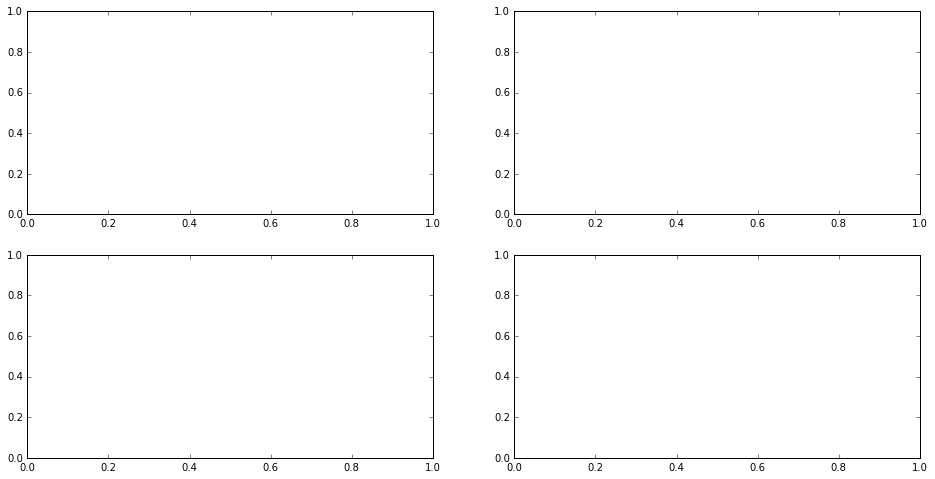

In [47]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(dados.PercSaudePIB, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("% do PIB gasto com saúde")
ax[0,0].set_ylabel("Expectativa de vida (em anos)")

ax[0,1].scatter(dados.GastoSaudePerCap, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Gasto com saúde per capita (em US$)")
ax[0,1].set_ylabel("Expectativa de vida (em anos)")
ax[0,1].set_xlim(0,10000)

ax[1,0].scatter(dados.PercSaudeGov, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("% gasto pelo governo com saúde")
ax[1,0].set_ylabel("Expectativa de vida (em anos)")
ax[1,0].set_xlim(0,35)

ax[1,1].scatter(dados.PropPopSanea, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("% da população geral com saneamento básico")
ax[1,1].set_ylabel("Expectativa de vida (em anos)")
ax[1,1].set_xlim(0,100)

plt.tight_layout(1)

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.GastoSaudePerCap, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Gasto com saúde per capita (em US$)")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_xlim(0,10000)

ax[1].scatter(np.log(dados.GastoSaudePerCap), dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("ln(Gasto com saúde per capita (em US$))")
ax[1].set_ylabel("Expectativa de vida (em anos)")


In [ ]:
dados.corr(method='pearson')

In [ ]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='ExpVida ~ PropPopSanea + LNGastoSaudePerCap', data = dados)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'PropPopSanea': x_surf.ravel(), 'LNGastoSaudePerCap': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['PropPopSanea'], dados['LNGastoSaudePerCap'], dados['ExpVida'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,100)
ax.set_ylim(0,10)
ax.set_xlabel('%Pop.Saneamento')
ax.set_ylabel('ln(Gasto Saúde)')
ax.set_zlabel('Expectativa de Vida)')

In [ ]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.ExpVida
X=dados.iloc[:,(4,5)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

In [ ]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)